# Taylor Series

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [36]:
# Define the Taylor series approximation function
def taylor_series(x0, y0, h, num_steps):
    t0 = time.time()
    t = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    y[0] = y0
    t[0] = x0
    for i in range(num_steps):
        y[i+1] = y[i] + h*f(t[i], y[i])
        t[i+1] = t[i] + h
    t1 = time.time()
    return y, t, (t1-t0)*1000

In [34]:
num_steps = 10

### First-order ODE:

 y' = 2x + 1, y(0) = 0


#### Exact solution

y(x) = x (x + 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12700\2565642881.py:34: RuntimeWarning: invalid value encountered in divide
  per_error = np.mean(np.abs(tolerance/exact_sol)[1:])*100


N: 1000
Time taken by Taylor Series method:  0.0
Per Mean error: 6.6877
Time for Taylor series approximation: 131.0754 milliseconds


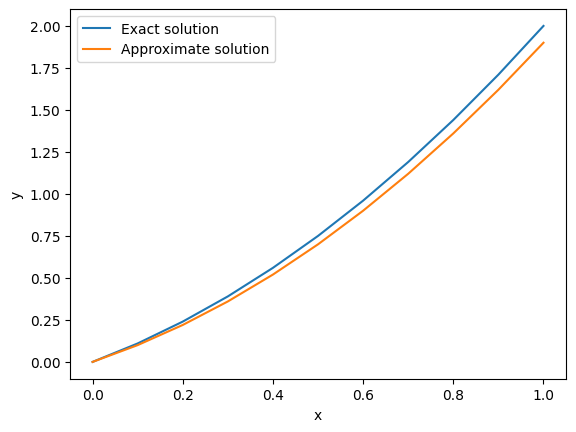

In [35]:
# Define the ODE
def f(x, y):
    return 2*x + 1

# Define the exact solution
def exact_solution(x):
    return x*(x + 1)

# Set the initial conditions and step size
x0, y0, h = 0, 0, 0.1
# num_steps = 100

# Calculate the approximate solution using Taylor Series method
approx_sol, t, taylor_time = taylor_series(x0, y0, h, num_steps)

# Calculate the exact solution
exact_sol = exact_solution(t)

# Calculate the tolerance value between the exact and approximate solutions
tolerance = np.abs(exact_sol - approx_sol)
per_error = np.mean(np.abs(tolerance/exact_sol)[1:])*100

# Print the time taken by each method
print(f"N: {n}")
print("Time taken by Taylor Series method: ", taylor_time)
print(f"Per Mean error: {per_error:.4f}")
print(f"Time for Taylor series approximation: {(end_time_taylor-start_time_taylor) *1000:.4f} milliseconds")

# Plot the comparison between the exact and approximate solutions
plt.plot(t, exact_sol, label='Exact solution')
plt.plot(t, approx_sol, label='Approximate solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Second-order ODE:

In [27]:
# Define the exact solution
def exact_solution(x):
    return 0.5*(3*np.sin(x) - x*np.cos(x))

# Define the derivative function
def f(x, y):
    return np.array([y[1], np.sin(x) - y[0]])

# Define the Taylor series approximation function
def taylor_series(x0, y0, h, n):
    x = x0
    y = y0
    for i in range(n):
        y = y + h*f(x, y)
        x = x + h
    return y

# Define the initial conditions
x0 = 0
y0 = 0

# Define the step size and the number of iterations
h = 0.1
n = int(1000/h)

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

exact_values = np.zeros(n+1)
taylor_values = np.zeros(n+1)

# Compute the exact solution and the Taylor series approximation
start_time_exact = time.time()
for i in range(n+1):
    exact_values[i] = exact_solution(x[i])
end_time_exact = time.time()
start_time_taylor = time.time()
for i in range(n+1):
    taylor_values[i] = taylor_series(x0, y0, h, i)
end_time_taylor = time.time()

# Compute the errors
# tol_midpoint = np.abs(y_midpoint - y_exact)
exact_errors = np.abs(taylor_values - exact_values)
# APE_midpoint = np.mean(np.abs(tol_midpoint/y_exact)[1:])*100
per_error = np.mean(np.abs(exact_errors/exact_values)[1:])*100

max_error = np.max(exact_errors)

# Print the results
print(f"N: {n}")
print(f"Per Mean error: {per_error:.4f}")
print(f"Time for exact solution: {end_time_exact-start_time_exact:.4f} seconds")
print(f"Time for Taylor series approximation: {end_time_taylor-start_time_taylor:.4f} seconds")

# Plot the results
plt.plot(x, exact_values, label="Exact solution")
plt.plot(x, taylor_values, label="Taylor series approximation")
plt.legend()
plt.show()

TypeError: 'int' object is not subscriptable